<a href="https://colab.research.google.com/github/Strata-Tech/Reddit_market_analysis/blob/main/Reddit_run_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import praw
import nltk
import time
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
client_id='SlBvI4ADPthsFg'
client_secret='5qTGPeg0UicPeoT3vOrPRXiSj2FUxQ'
user_agent='sentiment_analysis'
username='Nakamoto25'
password='Programmer123'

start_time = time.time()

reddit=praw.Reddit(client_id=client_id,client_secret=client_secret,user_agent=user_agent,username=username,password=password)
us={'TSLA','PLTR','SPCE','BABA','APPL','AMC','GME'}
blacklist={'I', 'ELON', 'WSB', 'THE', 'A', 'ROPE', 'YOLO', 'TOS', 'CEO', 'DD'}

In [ ]:
# set the program parameters
subs = ['wallstreetbets','stonks','stocks','investing']     # sub-reddit to search
post_flairs = {'Daily Discussion', 'Weekend Discussion'}  # posts flairs to search or None flair is automatically considered
goodAuth = {'AutoModerator'}   # authors whom comments are allowed more than once
uniqueCmt = True                # allow one comment per author per symbol
ignoreAuthP = {'example'}       # authors to ignore for posts
ignoreAuthC = {'example'}       # authors to ignore for comment
upvoteRatio = 0.70         # upvote ratio for post to be considered, 0.70 = 70%
ups = 20       # define # of upvotes, post is considered if upvotes exceed this #
limit = 10      # define the limit, comments 'replace more' limit
upvotes = 2     # define # of upvotes, comment is considered if upvotes exceed this #
picks = 10    # define # of picks here, prints as "Top ## picks are:"
picks_ayz = 5   # define # of picks for sentiment analysis

In [ ]:
posts=0
count=0 #counting tickers
c_analyzed=0 #comments
tickers={}
titles=[]
a_comments={} #dictionary of word/ticker to comments
cmt_auth={} #dictionary of word/ticker to author

In [ ]:
for sub in subs:

  subreddit=reddit.subreddit(sub)
  hot_python=subreddit.hot()   #for hot topics

  for submission in hot_python:

    flair=submission.link_flair_text
    author=submission.author.name


    
    if submission.upvote_ratio >= upvoteRatio and submission.ups > ups and (flair in post_flairs or flair is None) and author not in ignoreAuthP:
      submission.comment_sort='new'
      comments= submission.comments
      titles.append(submission.title)
      posts+=1
      submission.comments.replace_more(limit=limit)
      for comment in comments:
        #try except for deleted account
        try:
          auth=comment.author.name
        except:
          pass

        c_analyzed+=1

        #check for comment upvotes and author

        if comment.score>upvotes and auth not in ignoreAuthC:
          split=comment.body.split()
          for word in split:
            word=word.replace('$','')
            #upper=ticker,length of ticker<=5,excluded words
            if word.isupper() and len(word)<=5 and word not in blacklist and word in us:
              #unique comments, try/except for key errors
              if uniqueCmt and auth not in goodAuth:
                try:
                  if auth in cmt_auth[word]:
                    break

                except:
                  pass
              #counting tickers

              if word in tickers:
                tickers[word]+=1
                a_comments[word].append(comment.body)
                cmt_auth[word].append(auth)
                count+=1

              else:
                tickers[word]=1
                cmt_auth[word]=[auth]
                a_comments[word]=[comment.body]
                count+=1

#sorts the dictionary by its values
#https://www.tutorialspoint.com/how-to-sort-a-dictionary-in-python
symbols=dict(sorted(tickers.items(),key=lambda item:item[1],reverse=True))
top_picks=list(symbols.keys())[0:picks] #listing top 10 tickers
time=(time.time()-start_time)


#print top picks
print(f"It took {time:0.2f}seconds to analyze {c_analyzed} comments in  {posts} posts in {len(subs)} subreddits")

  
  

        

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

It took 1386.51seconds to analyze 10133 comments in  22 posts in 1 subreddits


In [ ]:
print(f" {picks} most mentioned picks: ")
times=[] # times appeared
top=[] # top 10 tickers and times appeared , list in a dict

for i in top_picks:
  print(f"{i}:{symbols[i]}")
  times.append(symbols[i])
  top.append(f"{i}:{symbols[i]}")
print(times)
print(top)

 10 most mentioned picks: 
GME:76
AMC:72
SPCE:24
TSLA:8
PLTR:7
BABA:5
[76, 72, 24, 8, 7, 5]
['GME:76', 'AMC:72', 'SPCE:24', 'TSLA:8', 'PLTR:7', 'BABA:5']


In [ ]:
# Applying Sentiment Analysis

scores, s = {}, {}

new_words = {
    'citron': -4.0,
    'hidenburg': -4.0,
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,
    'put': -4.0,
    'puts': -4.0,
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,
     'maintain': 1.0,
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,
     'crack': 2.5
}

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
vader = SentimentIntensityAnalyzer()
# adding custom words from new_words above
vader.lexicon.update(new_words)

In [ ]:
picks_sentiment=list(symbols.keys())[0:picks_ayz] #top 5
print(picks_sentiment)
print(a_comments)

['GME', 'AMC', 'SPCE', 'TSLA', 'PLTR']
{'PLTR': ['Just received an email from Schwab asking me to lend out my shares for shorts. \n\nI’m only holding CLOV and PLTR as far as individual stocks go. \n\nCLOV must be really hard to borrow right now.', 'Someone put some life into PLTR', 'Ahh, so _that’s_ what it feels like to invest in PLTR', 'Hold PLTR like always.', 'Wtf are y’all doing to my PLTR bags', 'PLTR dumping but why?', 'Tesla PLTR'], 'SPCE': ['SPCE TOMORROW $50+', 'I bought a fuckload of SPY and QQQ puts alongside UVXY calls this morning with no daytrades left using like half of my account after SPCE calls got me up to 800% gains. My account tipped over 25k and it was the perfect timing to allow me to sell all the fuckin puts I bought. \n\nI was just happy with my gains, but holy fuckin shit I thought SPY and QQQ were gonna keep sliding. I feel like mothafuckin Gordon Gecko in this bitch', 'Holding my SPCE until the launch.', 'All the “experts” who think SPCE had too good of a r

In [ ]:
scores, s = {}, {}


for symbol in picks_sentiment:
  stock_comments=a_comments[symbol]
  for cmnt in stock_comments:
    score=vader.polarity_scores(cmnt)
    if symbol in s:
      s[symbol][cmnt]=score
    else:
      s[symbol]={cmnt:score}

    if symbol in scores:
      for key, _ in score.items():

        scores[symbol][key]+=score[key]

    else:
      scores[symbol]=score

print(s)
print(scores)
print(score)
print(symbols)

{'GME': {'In all honesty, mods should just straight up ban GME from this page and anybody who is a part of the supercult, it’s getting beyond ridiculous. Even a simple factual statement like ‘SI on GME is around 20%’ will get you swarmed by drones convinced you and everyone else who isn’t on their knees sucking off Ryan Cohen are a shill.\n\nIt’s turned into qanon, seriously. They claim all conflicting opinions are ‘FUD’, all media outlets outside of their own are shills, trust the ‘DD’ (trust the plan). It’s fucking insufferable.': {'neg': 4.715, 'neu': 58.424, 'pos': 12.86, 'compound': 17.5071}, 'I hate the people that say they’re yoloing GME and AMC and then buy shares. That’s not a yolo play\n\nYolo play is buying weeklies on a volatile stock or 0DTE SPY calls': {'neg': 0.25, 'neu': 0.482, 'pos': 0.268, 'compound': 0.5859}, 'GME 7/30s are the way. Literally any strike. 7/14/21 gonna be epic. Actually anything after this friday gonna be wild. \n\nAlexa, play Friday by Rebecca Black.

In [ ]:
#calculating average

for key in score.keys():
  scores[symbol][key]=scores[symbol][key]/symbols[symbol]


print(scores[symbol][key])

-3.1234089266550713e-10


In [ ]:
#printing sentiment analysis
print(f" Sentiment analysis of top {picks_ayz} picks: ")
df=pd.DataFrame(scores)
df.index=['Bearish', 'Neutral', 'Bullish', 'Total/Compound']
# df=df.T
print(df)

 Sentiment analysis of top 5 picks: 
                    GME      AMC     SPCE    TSLA          PLTR
Bearish          4.7150   6.1920   1.8120  0.5800  6.331781e-10
Neutral         58.4240  54.3040  19.1180  5.5010  2.546367e-09
Bullish         12.8600  11.5030   3.0700  1.9190  3.605879e-10
Total/Compound  17.5071  12.6682   0.9318  1.8647 -3.123409e-10


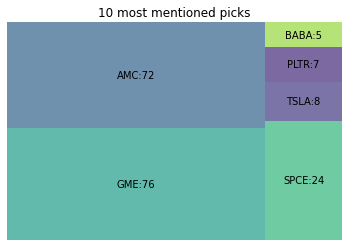

In [ ]:
# Date Visualization
# most mentioned picks    
squarify.plot(sizes=times, label=top, alpha=.7 )
plt.axis('off')
plt.title(f"{picks} most mentioned picks")
plt.show()

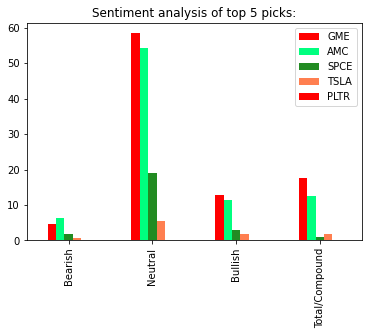

In [ ]:
# Sentiment analysis
df = df.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
df.plot(kind = 'bar', color=colors, title=f"Sentiment analysis of top {picks_ayz} picks:")
plt.show()